In [18]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [19]:
nonhousehold_energy_filepath = "../Dados/nrg_pc_203_page_linear.csv"
#household_energy_filepath = "../Dados/nrg_pc_202_page_linear.csv"

df_nonhousehold = pd.read_csv(nonhousehold_energy_filepath)

df_nonhousehold.describe()

,product,consom,OBS_VALUE
count,355.0,355.0,355.000000
mean,4100.0,4142903.0,0.032414
std,0.0,0.0,0.015873
min,4100.0,4142903.0,0.000000
25%,4100.0,4142903.0,0.024250
50%,4100.0,4142903.0,0.027700
75%,4100.0,4142903.0,0.034150
max,4100.0,4142903.0,0.116000


In [20]:
display(df_nonhousehold)

,DATAFLOW,LAST UPDATE,freq,product,consom,unit,tax,currency,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,AL,2021-S2,0.0000,d
1,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,AL,2022-S1,0.0000,d
2,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,AT,2017-S2,0.0270,NaN
3,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,AT,2018-S1,0.0262,NaN
4,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,AT,2018-S2,0.0277,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
350,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,UK,2018-S1,0.0248,NaN
351,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,UK,2018-S2,0.0266,NaN
352,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,UK,2019-S1,0.0262,NaN
353,ESTAT:NRG_PC_203$DEFAULTVIEW(1.0),01/02/23 23:00:00,S,4100,4142903,KWH,X_TAX,EUR,UK,2019-S2,0.0254,NaN


In [21]:
dados_eng_agg = df_nonhousehold.groupby(['geo']).OBS_VALUE.aggregate([min,max,len])

dados_eng_agg.head(5)

,min,max,len
geo,,,
AL,0.0000,0.0000,2
AT,0.0239,0.0584,10
BA,0.0354,0.0456,10
BE,0.0191,0.0485,10
BG,0.0191,0.0745,10


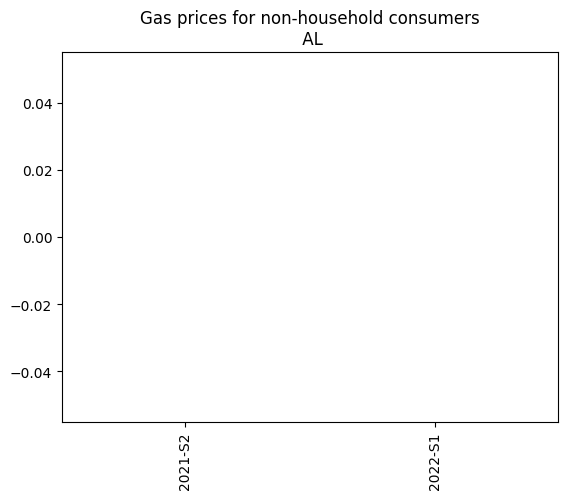

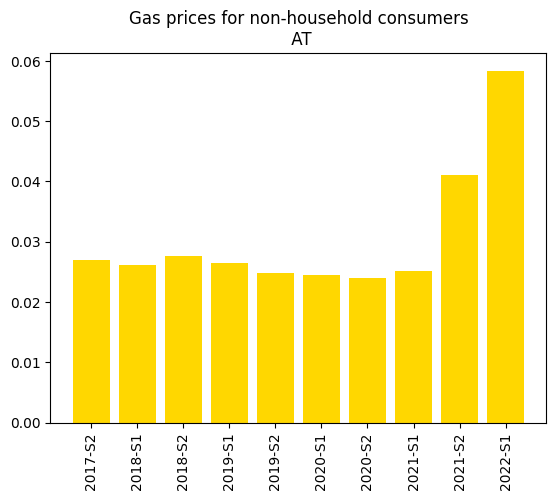

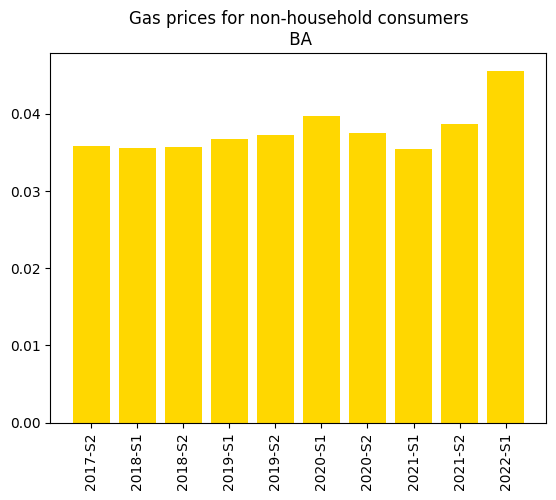

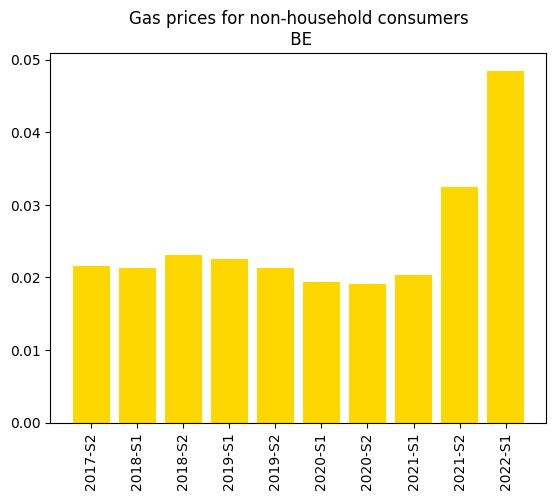

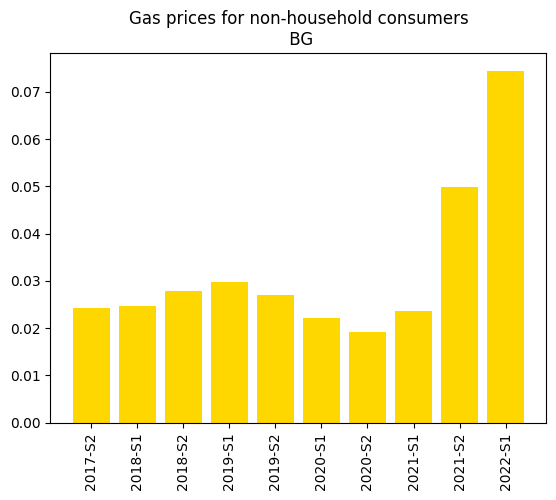

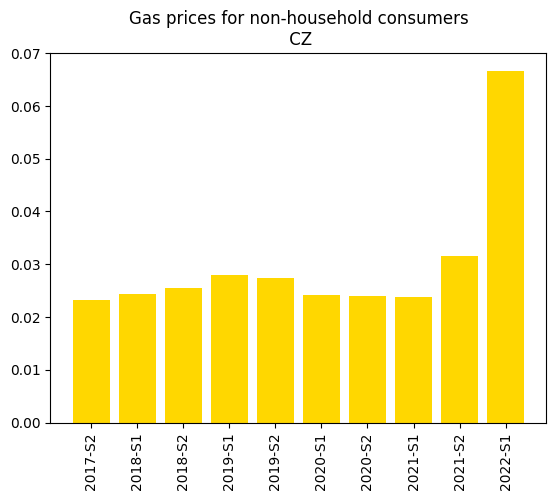

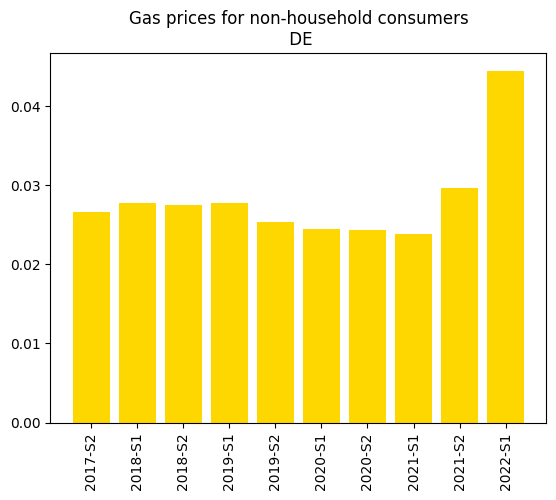

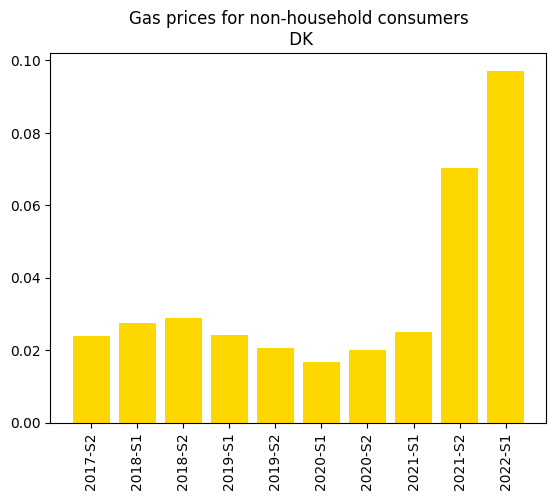

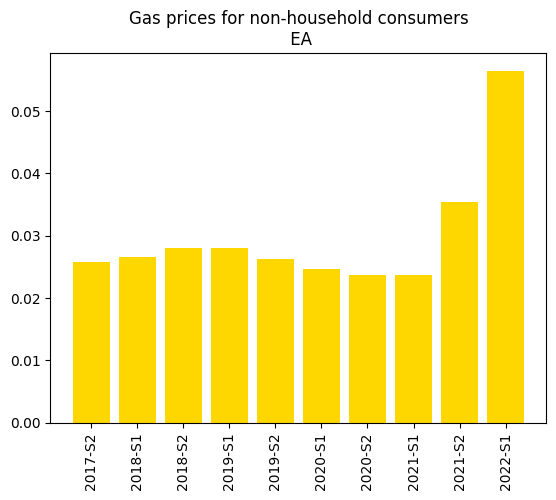

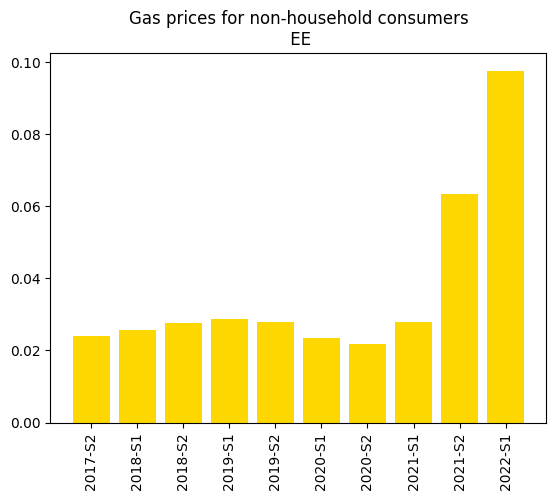

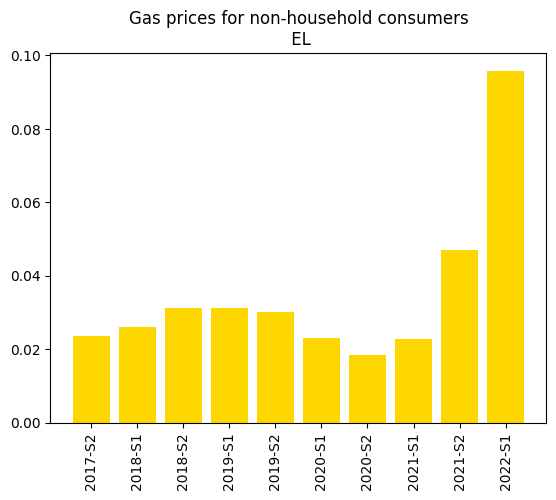

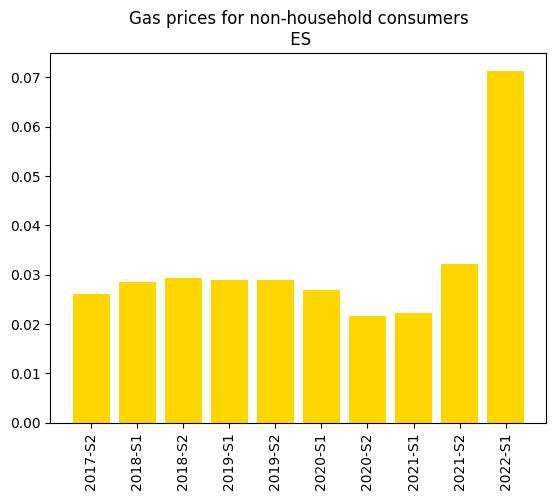

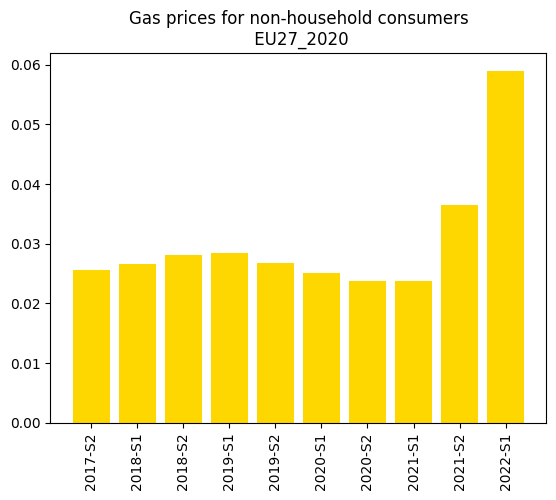

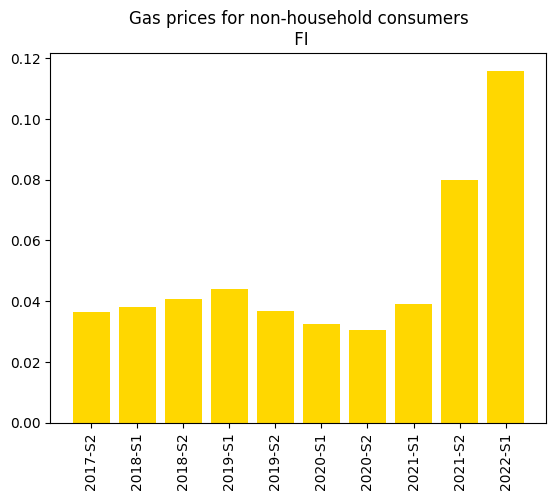

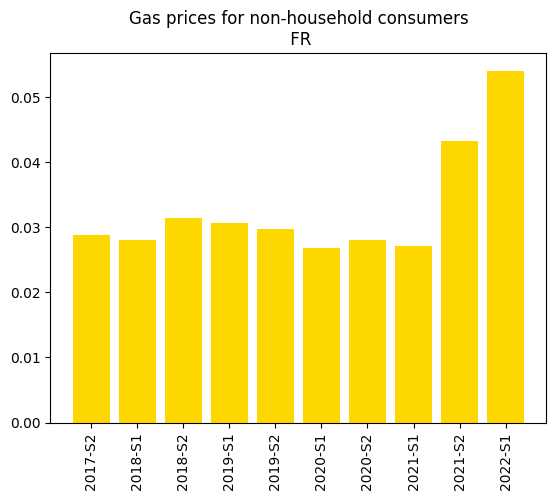

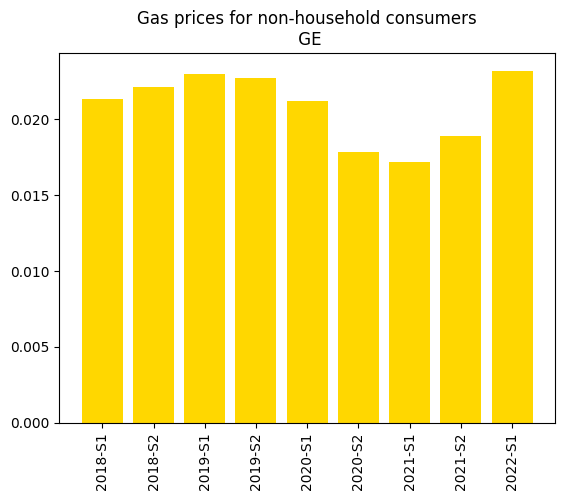

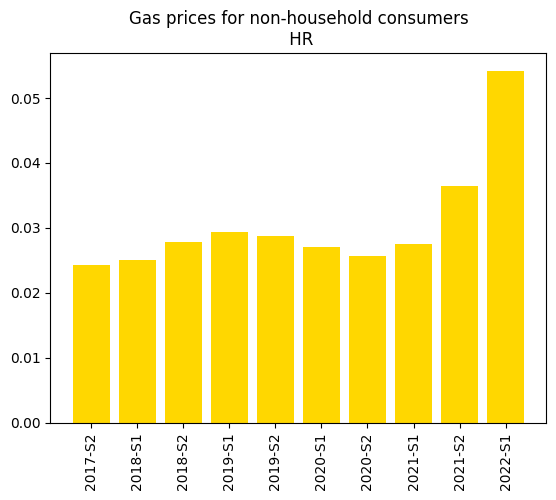

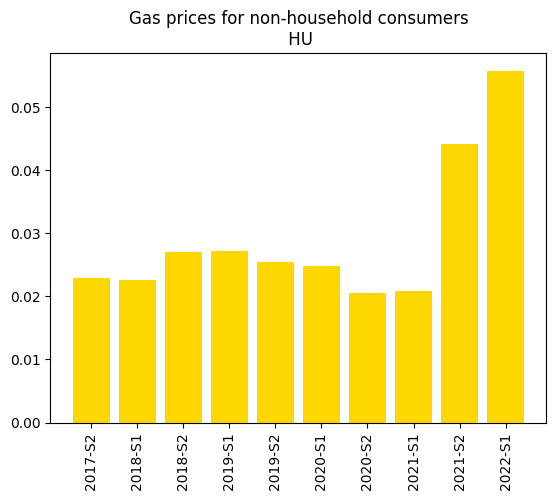

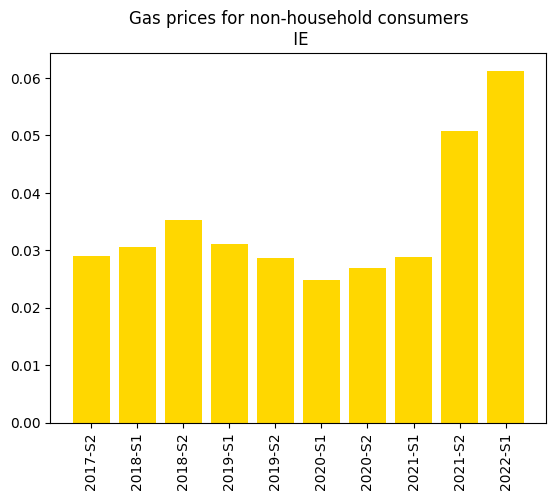

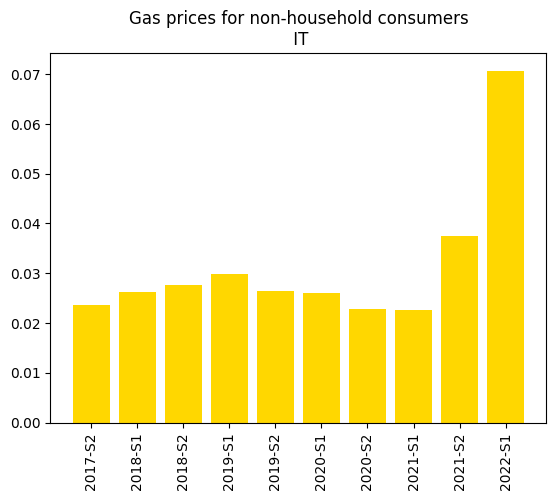

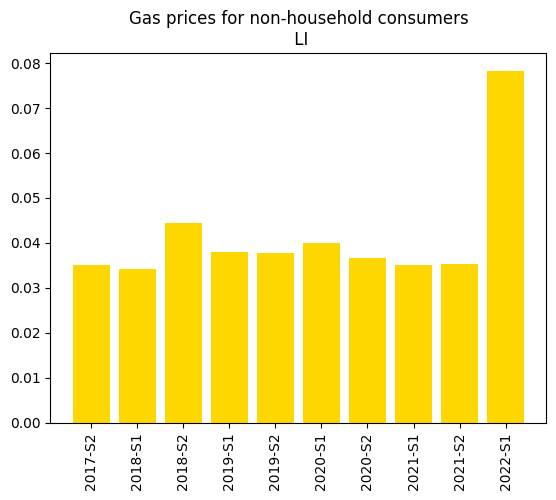

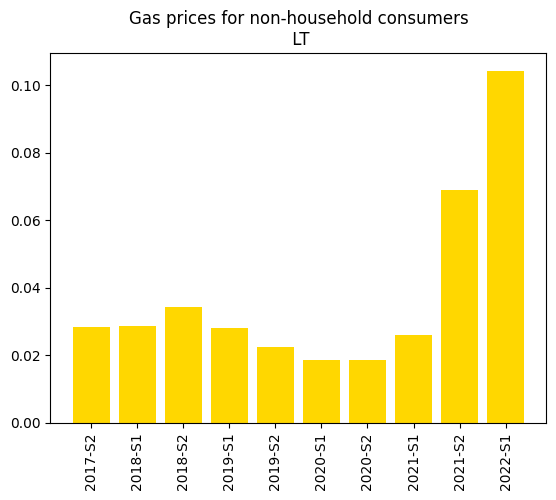

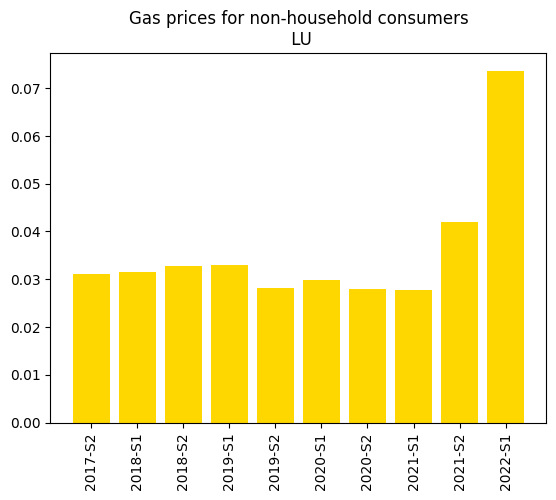

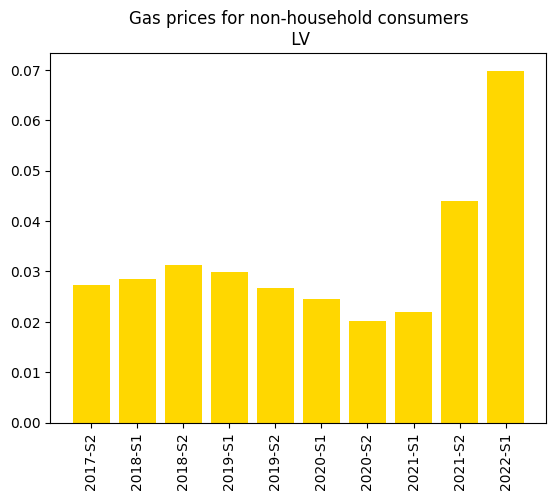

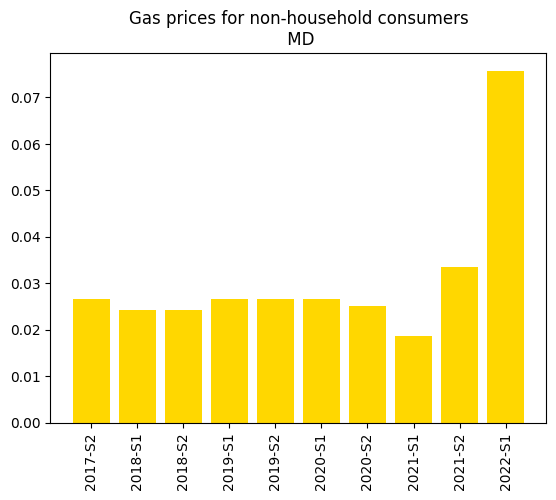

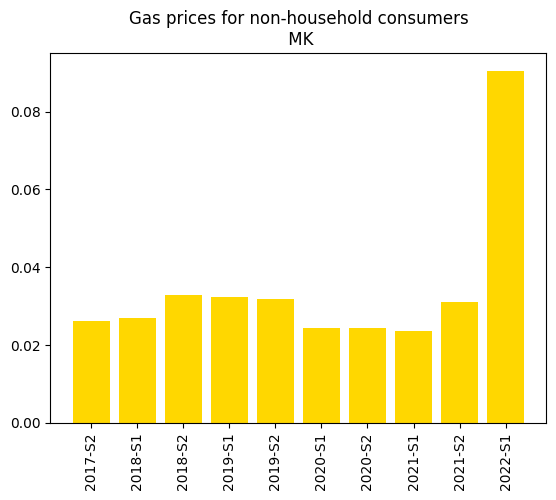

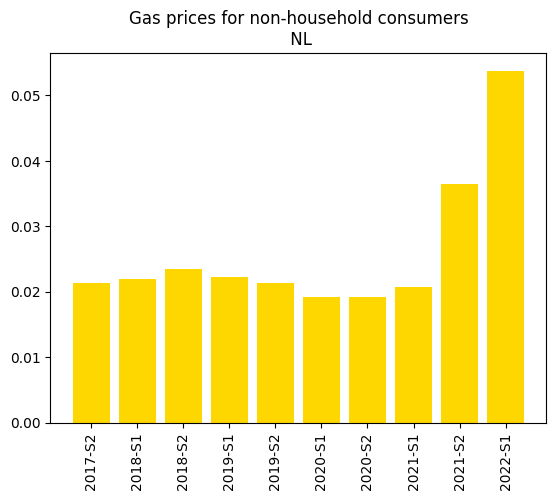

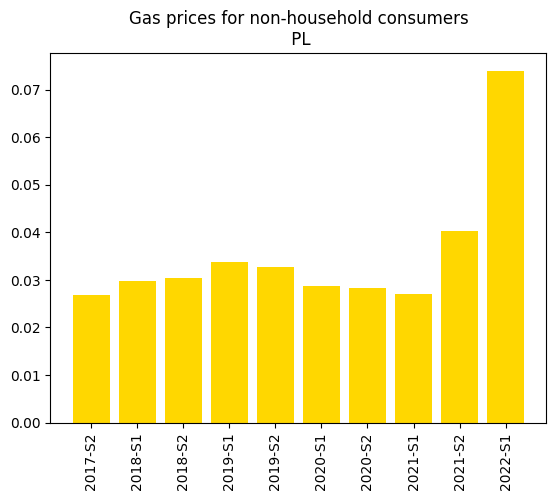

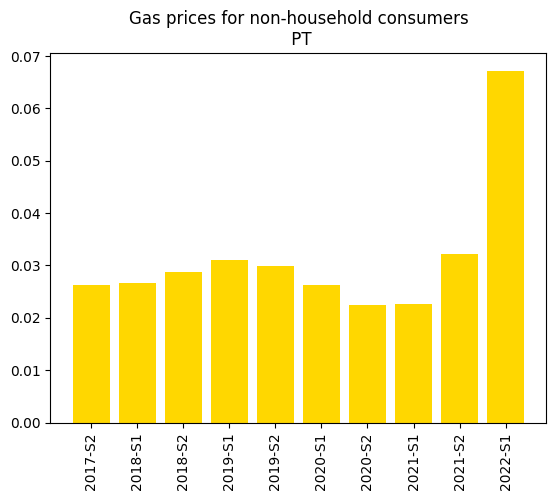

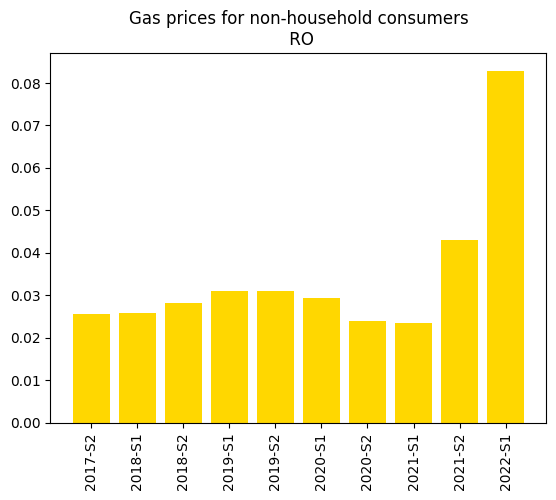

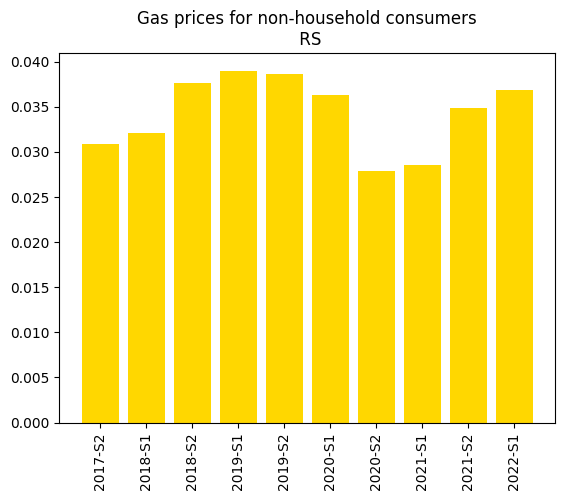

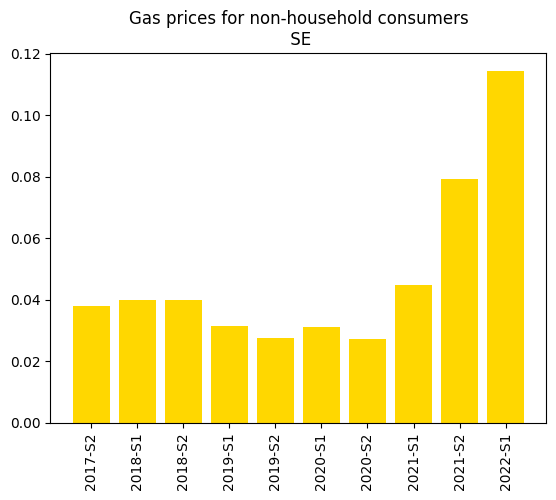

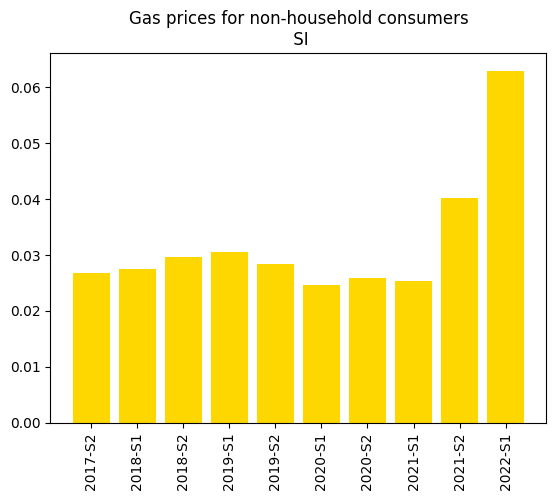

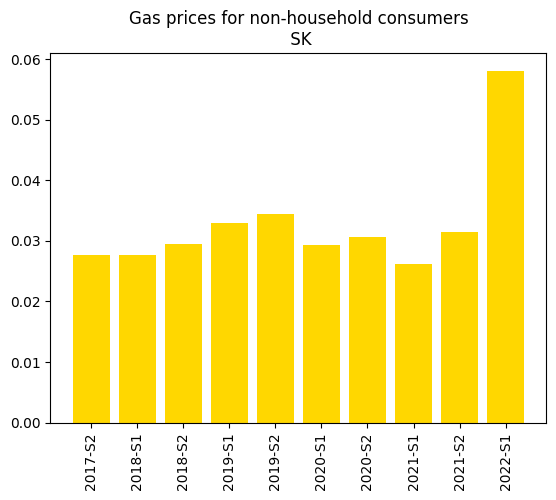

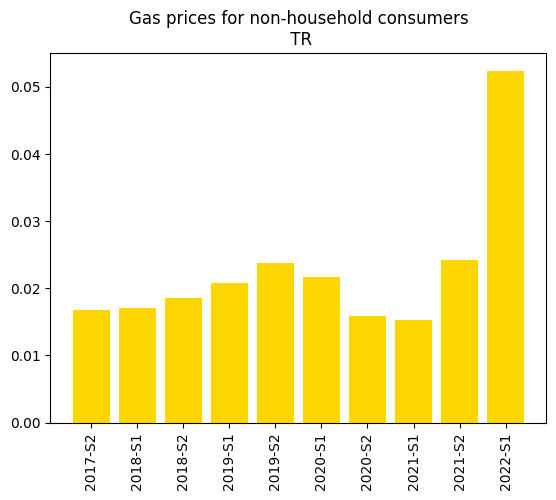

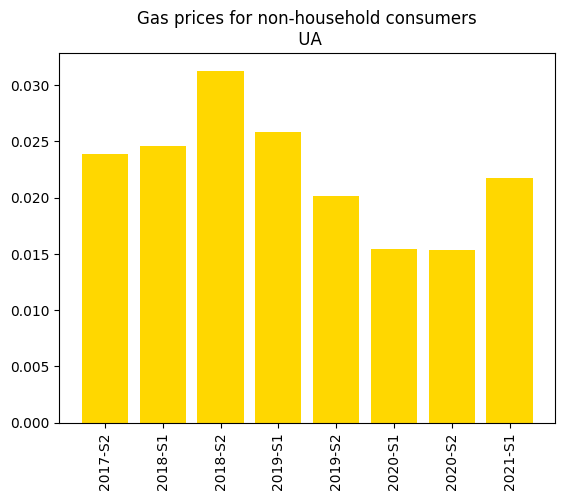

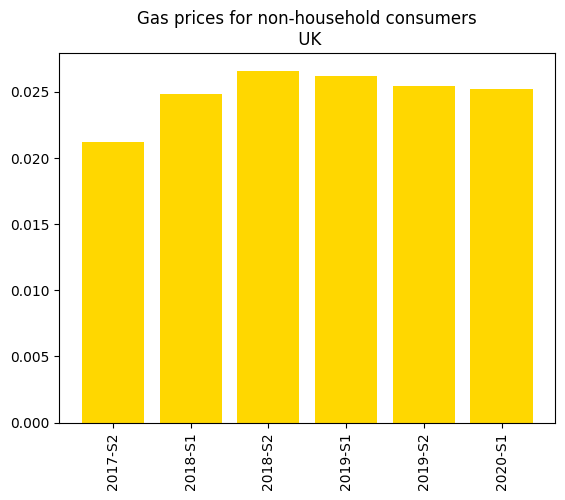

: 

In [23]:
from typing import List, TypedDict

class CountryRef(TypedDict):
    qtd: int
    date: str

class Country(TypedDict):
    name: str
    lista: List[CountryRef]

dados_country_ref_by_date = df_nonhousehold[['geo', 'TIME_PERIOD', 'OBS_VALUE']]

paises = dict()

country_aux = dados_country_ref_by_date.geo.tolist()
date_aux = dados_country_ref_by_date.TIME_PERIOD.tolist()
individual_aux = dados_country_ref_by_date.OBS_VALUE.tolist()


for country, date, individuals in zip(country_aux, date_aux, individual_aux):    
    if country in paises.keys():
        
        paises[country]['lista'].append( 
            CountryRef(
                qtd = individuals,
                date = date
            )
        )
    else:
        paises[country] = Country(
            lista = [
            CountryRef(
                qtd = individuals,
                date = date
            )]
        )

for pais in paises.keys():
    individuals = [indiv['qtd'] for indiv in paises[pais]['lista']]
    dates = [el['date'] for el in paises[pais]['lista']]
    
    plt.ticklabel_format(style='plain')

    plt.xticks(rotation=90)

    plt.bar(dates, individuals, color='#ffd700')
    
    plt.title(f'Gas prices for non-household consumers\n {pais}')
    
    plt.show()
